# Item-Based Collaborative Filtering

As before, we'll start by importing the MovieLens 100K data set into a pandas DataFrame:

In [1]:
import pandas as pd

r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('./ml-100k/u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('./ml-100k/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [2]:
ratings.loc[ratings['user_id'] == 0]

,movie_id,title,user_id,rating
6402,50,Star Wars (1977),0,5
18852,133,Gone with the Wind (1939),0,1
23859,172,"Empire Strikes Back, The (1980)",0,5


In [3]:
ratings.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
             99993,  99994,  99995,  99996,  99997,  99998,  99999, 100000,
            100001, 100002],
           dtype='int64', length=100003)

Now we'll pivot this table to construct a nice matrix of users and the movies they rated. NaN indicates missing data, or movies that a given user did not watch:

In [4]:
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now the magic happens - pandas has a built-in corr() method that will compute a correlation score for every column pair in the matrix! This gives us a correlation score between every pair of movies (where at least one user rated both movies - otherwise NaN's will show up.) That's amazing!

In [5]:
corrMatrix = userRatings.corr()
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


However, we want to avoid spurious results that happened from just a handful of users that happened to rate the same pair of movies. In order to restrict our results to movies that lots of people rated together - and also give us more popular results that are more easily recongnizable - we'll use the min_periods argument to throw out results where fewer than 100 users rated a given movie pair:

In [6]:
corrMatrix = userRatings.corr(method='spearman', min_periods=300) #pearson, kendall, spearman
corrMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now let's produce some movie recommendations for user ID 0, who I manually added to the data set as a test case. This guy really likes Star Wars and The Empire Strikes Back, but hated Gone with the Wind. I'll extract his ratings from the userRatings DataFrame, and use dropna() to get rid of missing data (leaving me only with a Series of the movies I actually rated:)

In [7]:
myRatings = userRatings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [8]:
myRatings.index

Index(['Empire Strikes Back, The (1980)', 'Gone with the Wind (1939)',
       'Star Wars (1977)'],
      dtype='object', name='title')

Now, let's go through each movie I rated one at a time, and build up a list of possible recommendations based on the movies similar to the ones I rated.

So for each movie I rated, I'll retrieve the list of similar movies from our correlation matrix. I'll then scale those correlation scores by how well I rated the movie they are similar to, so movies similar to ones I liked count more than movies similar to ones I hated:

In [9]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")
    # Retrieve similar movies to this one that I rated
    sims = corrMatrix[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * (myRatings[i]/3.0)**2)
    # Add the score to the list of similarity candidates
    simCandidates = simCandidates.append(sims)
    
#Glance at our results so far:
print ("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Empire Strikes Back, The (1980)              2.777778
Star Wars (1977)                             2.777778
Return of the Jedi (1983)                    1.857394
Empire Strikes Back, The (1980)              1.810200
Star Wars (1977)                             1.810200
Return of the Jedi (1983)                    1.702051
Raiders of the Lost Ark (1981)               1.270119
Raiders of the Lost Ark (1981)               1.245847
Indiana Jones and the Last Crusade (1989)    0.962597
Back to the Future (1985)                    0.708758
dtype: float64


This is starting to look like something useful! Note that some of the same movies came up more than once, because they were similar to more than one movie I rated. We'll use groupby() to add together the scores from movies that show up more than once, so they'll count more:

In [10]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()

In [11]:
simCandidates.sort_values(inplace = True, ascending = False)
simCandidates.head(10)

Star Wars (1977)                             4.587978
Empire Strikes Back, The (1980)              4.587978
Return of the Jedi (1983)                    3.559445
Raiders of the Lost Ark (1981)               2.515966
Indiana Jones and the Last Crusade (1989)    0.962597
Back to the Future (1985)                    0.708758
Star Trek: First Contact (1996)              0.681481
Independence Day (ID4) (1996)                0.528547
Toy Story (1995)                             0.435693
Godfather, The (1972)                        0.392544
dtype: float64

The last thing we have to do is filter out movies I've already rated, as recommending a movie I've already watched isn't helpful:

In [12]:
filteredSims = simCandidates.drop(myRatings.index.drop('Gone with the Wind (1939)'))
filteredSims.head(10)

Return of the Jedi (1983)                    3.559445
Raiders of the Lost Ark (1981)               2.515966
Indiana Jones and the Last Crusade (1989)    0.962597
Back to the Future (1985)                    0.708758
Star Trek: First Contact (1996)              0.681481
Independence Day (ID4) (1996)                0.528547
Toy Story (1995)                             0.435693
Godfather, The (1972)                        0.392544
Liar Liar (1997)                             0.376765
Twelve Monkeys (1995)                        0.318238
dtype: float64

There we have it!

## Exercise

Can you improve on these results? Perhaps a different method or min_periods value on the correlation computation would produce more interesting results.

Also, it looks like some movies similar to Gone with the Wind - which I hated - made it through to the final list of recommendations. Perhaps movies similar to ones the user rated poorly should actually be penalized, instead of just scaled down?

There are also probably some outliers in the user rating data set - some users may have rated a huge amount of movies and have a disporportionate effect on the results. Go back to earlier lectures to learn how to identify these outliers, and see if removing them improves things.

For an even bigger project: we're evaluating the result qualitatively here, but we could actually apply train/test and measure our ability to predict user ratings for movies they've already watched. Whether that's actually a measure of a "good" recommendation is debatable, though!

In [13]:
user_counts = ratings['user_id'].value_counts()

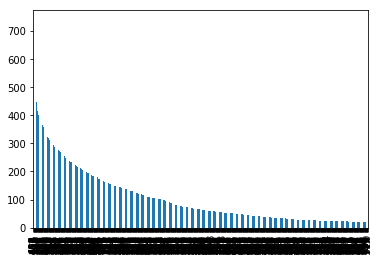

In [14]:
%matplotlib inline
user_counts.plot(kind='bar')

In [15]:
outliers = user_counts[user_counts > 150].index
outliers

Int64Index([405, 655,  13, 450, 276, 416, 537, 303, 234, 393,
            ...
            567,  83, 548, 488, 320,  58, 693, 401,  44,  23],
           dtype='int64', length=226)

In [16]:
indeces = ratings.loc[ratings.user_id.isin(outliers)].index
ratings_2 = ratings.drop(indeces)

In [17]:
counts_2 = ratings_2['user_id'].value_counts()
counts_2.head()

521    150
848    150
294    150
290    150
699    149
Name: user_id, dtype: int64

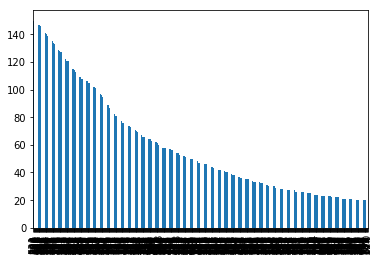

In [18]:
counts_2.plot(kind='bar')

In [19]:
NoOutliers_ratings = ratings.pivot_table(index='user_id', columns='title', values='rating')

In [20]:
correla = NoOutliers_ratings.corr(method='pearson', min_periods=300)

In [21]:
myRatings = NoOutliers_ratings.loc[0].dropna()
myRatings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

In [22]:
simCandidates = pd.Series()
for i in range(0, len(myRatings.index)):
    print ("Adding sims for " + myRatings.index[i] + "...")
    # Retrieve similar movies to this one that I rated
    sims = correla[myRatings.index[i]].dropna()
    # Now scale its similarity by how well I rated this movie
    sims = sims.map(lambda x: x * (myRatings[i]/3.0)**2)
    # Add the score to the list of similarity candidates
    simCandidates = simCandidates.append(sims)
    
#Glance at our results so far:
print ("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))

Adding sims for Empire Strikes Back, The (1980)...
Adding sims for Gone with the Wind (1939)...
Adding sims for Star Wars (1977)...
sorting...
Empire Strikes Back, The (1980)              2.777778
Star Wars (1977)                             2.777778
Empire Strikes Back, The (1980)              2.078757
Star Wars (1977)                             2.078757
Return of the Jedi (1983)                    2.003414
Return of the Jedi (1983)                    1.868211
Raiders of the Lost Ark (1981)               1.496276
Raiders of the Lost Ark (1981)               1.489214
Indiana Jones and the Last Crusade (1989)    0.972519
Back to the Future (1985)                    0.763442
dtype: float64


In [23]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()
simCandidates.sort_values(inplace = True, ascending=False)
Recomended = simCandidates.drop(myRatings.index.drop('Gone with the Wind (1939)'))

In [24]:
Recomended

Return of the Jedi (1983)                    3.871625
Raiders of the Lost Ark (1981)               2.985490
Indiana Jones and the Last Crusade (1989)    0.972519
Back to the Future (1985)                    0.763442
Star Trek: First Contact (1996)              0.709803
Independence Day (ID4) (1996)                0.690983
Godfather, The (1972)                        0.527153
Toy Story (1995)                             0.500055
Twelve Monkeys (1995)                        0.432029
Liar Liar (1997)                             0.417477
Contact (1997)                               0.374894
Rock, The (1996)                             0.133159
Fargo (1996)                                 0.123374
Silence of the Lambs, The (1991)             0.109689
Pulp Fiction (1994)                         -0.059910
dtype: float64